# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [66]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
### Data generation
X, y = make_moons(n_samples=300, noise=)

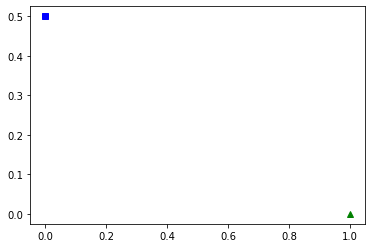

In [67]:
### This function allows to plot the two moons
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

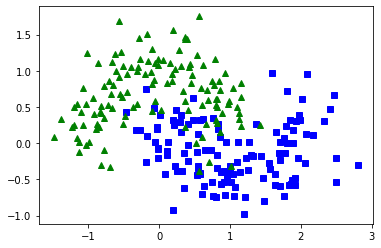

In [74]:
X, y = make_moons(n_samples=250, noise=0.3)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

# noise permet de casser la répartition des points qui sont normalement répartie par une gaussienne et sample le nombre de point

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [117]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X, y

(array([[ 1.39626104e+00, -9.88215773e-02],
        [-1.08218103e+00, -3.06581366e-02],
        [-4.76776689e-01,  7.04088288e-01],
        [ 3.39396447e-01, -1.08428839e-01],
        [ 5.28894543e-01, -7.80694326e-02],
        [ 2.57550962e-01, -2.90768113e-01],
        [ 1.45304697e+00, -6.92673024e-01],
        [-4.27852311e-01,  9.77141541e-01],
        [-1.33326958e-02,  1.10243784e+00],
        [ 1.43771807e-01, -3.25162735e-01],
        [ 1.77806071e+00, -4.93937660e-01],
        [ 1.99215322e+00,  4.99969656e-02],
        [-1.03508548e+00,  4.44912906e-01],
        [ 9.70879802e-01, -6.37815687e-01],
        [-8.19577612e-01,  6.44126759e-01],
        [-1.87321829e-01,  1.08906867e+00],
        [ 1.79752413e+00, -4.67688362e-01],
        [ 3.69014999e-01,  3.05644793e-01],
        [-2.66351456e-01, -4.72671781e-01],
        [-6.74727508e-01,  5.91742668e-01],
        [ 3.45613657e-01, -6.08535963e-02],
        [ 4.63123076e-01,  5.02968009e-01],
        [ 2.14737734e+00,  1.632

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [163]:
from keras.models import Sequential
from keras.layers import Dense

In [185]:
def initialize_model(input_dim):

    # define the model
    model = Sequential()
    
    model.compile(loss = "binary_crossentropy",
              metrics = ["accuracy"],
                 optimizer = "adam")
    
    # add the first layer with 5 neurons and relu activation
    model.add(Dense(5, activation='relu', input_dim=input_dim))

    # add the output layer for 2-class classification
    model.add(Dense(1, activation='sigmoid'))

    return model

model = initialize_model(2)

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [165]:
a = 5 * 2 + 2*2 + 5*1 + 2*1

model.summary(), a

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 5)                 15        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


(None, 21)

You are now ready to train your algorithm on the training set:

In [166]:
model.fit(X_train, y_train, batch_size = 32, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7436 - accuracy: 0.5257
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.5257
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.5257
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.5257
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.5257
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.5257
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.5257
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.5257
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5257
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5257
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8400
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8400
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8400
Epoch 87/100
6/6 [==============================] - 0s 0s/step - loss: 0.4381 - accuracy: 0.8400
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8400
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8400
Epoch 90/100
6/6 [==============================] - 0s 507us/step - loss: 0.4314 - accuracy: 0.8400
Epoch 91/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8400
Epoch 92/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8400
Epoch 93/100
6/6 [==============================] - 0s 0s/step - loss: 0.4251 - accuracy: 0.8400
Epoch 94/100
6/6 [===============

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [167]:
model.history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x221c135ea90>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7436364889144897,
   0.7375224232673645,
   0.7317683696746826,
   0.7263702154159546,
   0.7211037874221802,
   0.716017484664917,
   0.7107812166213989,
   0.7059752345085144,
   0.7011625170707703,
   0.6964037418365479,
   0.6918635964393616,
   0.6872775554656982,
   0.6829239130020142,
   0.678595781326294,
   0.6742438077926636,
   0.6701889038085938,
   0.6659612059593201,
   0.6617563962936401,
   0.6576632261276245,
   0.6535691618919373,
   0.649610161781311,
   0.6456374526023865,
   0.6416787505149841,
   0.637819230556488,
   0.6340793967247009,
   0.630229651927948,
   0.6263478994369507,
   0.6226098537445068,
   0.6190087795257568,
   0.6153537631034851,
   0.6116763353347778,
   0.6080319285392761,
   0.6043339967727661,
   0.6007908582687378,
   0.5971317291259766,
   0.593481183052063,
   0.58992

❓ Plot the history of the train loss using the following function

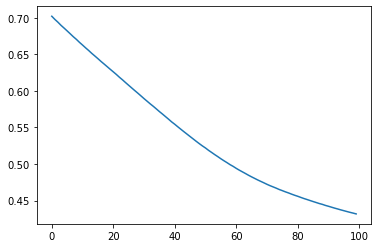

In [162]:
plt.plot(model.history.epoch, model.history.history["loss"])

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [199]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 0s/step


You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [175]:
evalu = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 0s/step - loss: 0.3962 - accuracy: 0.8400


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [177]:
accuracy = evalu[1]

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """Plot the 2D-decision region of a classifier with matplotlib along its first two dimensions X[:,0] and X[:,1].

    Args:
        X (np.Array): (n,p) dataset to classify
        y (np.Array): (n,) array of labels. Works well up to 5 unique labels.
        classifier: fitted classifier with `.predict()` method 
        test_idx (int, optional):  Index of test datapoints within X to display with a larger mark style. Defaults to None.
        resolution (float, optional): Resolution of the meshgrid used to colorize regions. Defaults to 0.02.
    """

    # setup marker generator and color map up for up to 5 classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='x', label=cl)

    # Plot test samples if they exist
    if not test_idx is None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=1, color=cmap(idx),
                        linewidths=1, marker='o', s=55, label=f'test {cl}')
    plt.legend()


1940/1940 [==============================] - 2s 807us/step


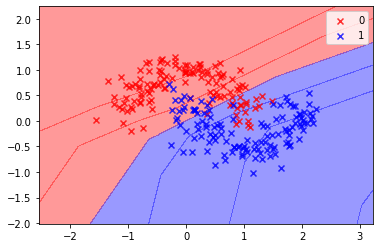

In [181]:
plot_decision_regions(X, y, model, test_idx=None, resolution=0.02)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [186]:
model = initialize_model(2)
model.fit(X_train, y_train, batch_size = 8, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 1ms/step - loss: 0.6346 - accuracy: 0.7371
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7486
Epoch 3/500
22/22 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.7429
Epoch 4/500
22/22 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.7600
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7600
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7771
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7829
Epoch 8/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7943
Epoch 9/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.8057
Epoch 10/500
22/22 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.8171
Epoch 11/

Epoch 83/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8571
Epoch 84/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8571
Epoch 85/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8571
Epoch 86/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8629
Epoch 87/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8629
Epoch 88/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8629
Epoch 89/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8629
Epoch 90/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8629
Epoch 91/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.8629
Epoch 92/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8629


22/22 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8571
Epoch 165/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8571
Epoch 166/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.8571
Epoch 167/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2977 - accuracy: 0.8571
Epoch 168/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8571
Epoch 169/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8571
Epoch 170/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8571
Epoch 171/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8571
Epoch 172/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.8571
Epoch 173/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8571
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8800
Epoch 246/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8800
Epoch 247/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8800
Epoch 248/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8800
Epoch 249/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.8800
Epoch 250/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8800
Epoch 251/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8800
Epoch 252/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8800
Epoch 253/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8800
Epoch 254/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8800
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.8857
Epoch 327/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.8800
Epoch 328/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.8857
Epoch 329/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2705 - accuracy: 0.8857
Epoch 330/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.8857
Epoch 331/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8800
Epoch 332/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2698 - accuracy: 0.8857
Epoch 333/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.8857
Epoch 334/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8800
Epoch 335/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8857
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.8971
Epoch 408/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8971
Epoch 409/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8971
Epoch 410/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.8971
Epoch 411/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.8971
Epoch 412/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8971
Epoch 413/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.8971
Epoch 414/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.8971
Epoch 415/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.8914
Epoch 416/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8914
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9086
Epoch 489/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9143
Epoch 490/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2243 - accuracy: 0.9086
Epoch 491/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9086
Epoch 492/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9143
Epoch 493/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9143
Epoch 494/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9200
Epoch 495/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9200
Epoch 496/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.9200
Epoch 497/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9200
Epoc

1940/1940 [==============================] - 2s 900us/step


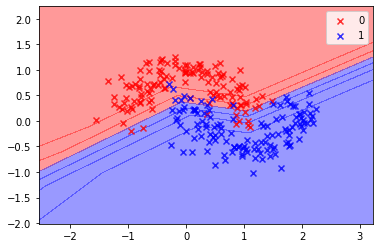

In [188]:
plot_decision_regions(X, y, model, test_idx=None, resolution=0.02)

❓ Did the test accuracy improve?

In [ ]:
# J'ai pris 7% 

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [189]:
def initialize_model(input_dim):

    # define the model
    model = Sequential()
    
    model.compile(loss = "binary_crossentropy",
              metrics = ["accuracy"],
                 optimizer = "adam")
    
    # add the first layer with 5 neurons and relu activation
    model.add(Dense(20, activation='relu', input_dim=input_dim))
    model.add(Dense(10, activation='relu', input_dim=input_dim))
    model.add(Dense(5, activation='relu', input_dim=input_dim))

    # add the output layer for 2-class classification
    model.add(Dense(1, activation='sigmoid'))

    return model

❓ What is the number of parameters of your new model?

In [192]:
model = initialize_model(2)
model.summary()
# 331 paramètres

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 20)                60        
                                                                 
 dense_43 (Dense)            (None, 10)                210       
                                                                 
 dense_44 (Dense)            (None, 5)                 55        
                                                                 
 dense_45 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [193]:
model.fit(X_train, y_train, batch_size = 32, epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 2ms/step - loss: 0.6778 - accuracy: 0.6171
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.7657
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.7714
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.7771
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7657
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7714
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.7886
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7829
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.7943
Epoch 10/500
6/6 [==============================] - 0s 0s/step - loss: 0.6268 - accuracy: 0.8057
Epoch 11/500
6/6 [============

6/6 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.8971
Epoch 85/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8971
Epoch 86/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.8971
Epoch 87/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8971
Epoch 88/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8971
Epoch 89/500
6/6 [==============================] - 0s 0s/step - loss: 0.2468 - accuracy: 0.8971
Epoch 90/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8971
Epoch 91/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.8971
Epoch 92/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.8971
Epoch 93/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.8971
Epoch 94/500
6/6 [================

6/6 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9371
Epoch 168/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9371
Epoch 169/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9429
Epoch 170/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9371
Epoch 171/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9371
Epoch 172/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9371
Epoch 173/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9371
Epoch 174/500
6/6 [==============================] - 0s 0s/step - loss: 0.1580 - accuracy: 0.9371
Epoch 175/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9371
Epoch 176/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9371
Epoch 177/500
6/6 [======

6/6 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9600
Epoch 250/500
6/6 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9657
Epoch 251/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9657
Epoch 252/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9600
Epoch 253/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9600
Epoch 254/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0980 - accuracy: 0.9657
Epoch 255/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9657
Epoch 256/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9600
Epoch 257/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9600
Epoch 258/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9657
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9771
Epoch 332/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9771
Epoch 333/500
6/6 [==============================] - 0s 404us/step - loss: 0.0813 - accuracy: 0.9771
Epoch 334/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9771
Epoch 335/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9771
Epoch 336/500
6/6 [==============================] - 0s 701us/step - loss: 0.0805 - accuracy: 0.9771
Epoch 337/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9771
Epoch 338/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9771
Epoch 339/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9771
Epoch 340/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9771
Epoch 341/500
6/6 [=

6/6 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9771
Epoch 414/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9771
Epoch 415/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9771
Epoch 416/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9771
Epoch 417/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9771
Epoch 418/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9771
Epoch 419/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9771
Epoch 420/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9771
Epoch 421/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9771
Epoch 422/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9771
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9771
Epoch 496/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9771
Epoch 497/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9771
Epoch 498/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9771
Epoch 499/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9771
Epoch 500/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9771


1940/1940 [==============================] - 2s 989us/step


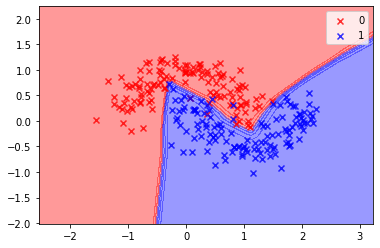

In [197]:
plot_decision_regions(X, y, model, test_idx=None, resolution=0.02)

❓ Do you think we have overfitted on the noise? Check it out below

In [196]:
print("oui")

oui


# OUI